In [258]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import random

In [259]:
def show_img(img: ndarray, title: str = ''):
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

## encoding

In [249]:
from PIL import Image


def encode_string_as_image(string):
    # Trim or pad the string to match the desired length of 64 characters
    string = string[:64].ljust(64, " ")

    # Create a new 8x8 RGB image
    image = Image.new("RGB", (8, 8))

    # Create a pixel access object for the image
    pixels = image.load()

    # Iterate over each character in the string
    for i, char in enumerate(string):
        # Convert the ASCII value of the character to RGB values
        r = ord(char) % 256
        g = (ord(char) // 256) % 256
        b = (ord(char) // 256 // 256) % 256

        # Calculate the row and column index for the pixel
        row = i // 8
        col = i % 8

        # Set the pixel color in the image
        pixels[col, row] = (r, g, b)

    return image

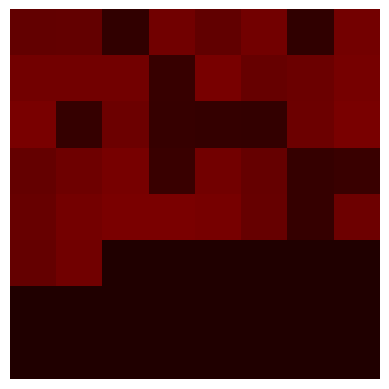

In [250]:
show_img(encode_string_as_image("bc1qar0srrr7xfkvy5l643lydnw9re59gtzzwf5mdq"))

In [278]:
print('main ascii characters:')
for c in range(33, 126):
    print(chr(c), end='')

main ascii characters:
!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}

In [273]:
idxs = list(np.arange(0, 8*8*3))

np.random.seed(42)
np.random.shuffle(idxs)

print('random index order:')
print('[' + ', '.join(str(i) for i in idxs) + ']')

random index order:
[45, 136, 76, 143, 113, 177, 15, 18, 16, 9, 78, 112, 66, 65, 153, 30, 145, 69, 111, 68, 171, 154, 118, 98, 67, 115, 24, 158, 60, 141, 114, 166, 19, 90, 170, 5, 133, 142, 165, 82, 109, 162, 35, 135, 42, 182, 101, 55, 75, 126, 29, 156, 56, 51, 163, 38, 31, 155, 12, 41, 159, 189, 184, 97, 26, 123, 85, 95, 2, 46, 100, 93, 128, 36, 180, 22, 183, 117, 127, 11, 119, 152, 6, 27, 104, 4, 32, 124, 138, 122, 137, 10, 62, 96, 139, 0, 172, 146, 70, 187, 64, 44, 120, 28, 40, 148, 175, 25, 23, 144, 140, 81, 108, 79, 84, 39, 125, 86, 77, 186, 161, 47, 94, 147, 190, 61, 73, 33, 43, 132, 3, 105, 53, 173, 150, 178, 49, 80, 34, 7, 110, 91, 83, 169, 174, 89, 8, 13, 59, 164, 131, 17, 72, 168, 134, 167, 176, 63, 54, 107, 50, 188, 58, 48, 88, 21, 57, 160, 185, 129, 37, 157, 181, 1, 52, 149, 130, 151, 103, 99, 116, 87, 74, 121, 191, 20, 71, 106, 14, 92, 179, 102]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


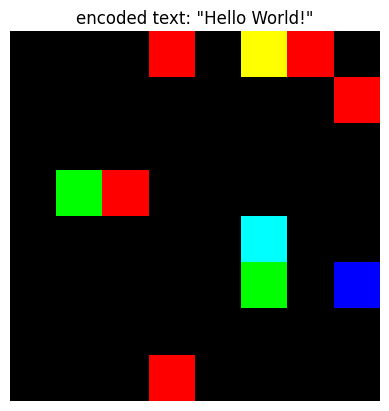

In [282]:
text = 'Hello World!'

img = np.zeros((1, 8 * 8 * 3))
for i, c in enumerate(text):
    img[0, idxs[i]] = ord(c)

show_img(img.reshape((8, 8, 3)), f'encoded text: "{text}"')

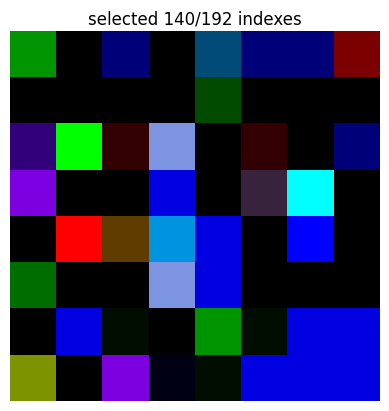

In [269]:
selected_idxs = idxs[:len(idxs) - np.random.choice(np.arange(0, len(idxs)))]

img = np.array(Image.open('../valid_faces/00001.png'))

new_img = img.copy()
new_img = new_img.reshape(8*8*3)
new_img[selected_idxs] = 0

show_img(new_img.reshape((8, 8, 3)), f'selected {len(selected_idxs)}/192 indexes')